# Tutorial: How to predict using a pretrained rnn

## ⚙️ Install grainlearning package 
(Not necessary if you are running jupyter-lab on an environment where grainlearning and rnn dependencies are installed)

In [ ]:
pip install grainlearning --extras "rnn"

In [1]:
import grainlearning.rnn.predict as predict_rnn
from pathlib import Path

### Load the pretrained model

In [2]:
path_to_trained_model = Path('/Users/luisaorozco/Documents/Projects/GrainLearning/grainLearning/grainlearning/rnn/trained_models/rnn_triaxial_undrained')
path_to_data = Path('/Users/luisaorozco/Documents/Projects/GrainLearning/data/TriaxialCompression/triaxial_compression_variable_input.hdf5')

In [3]:
model, train_stats, config = predict_rnn.get_pretrained_model(path_to_trained_model)

Metal device set to: Apple M1 Pro


2023-02-19 18:09:02.933427: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-19 18:09:02.933597: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 1. Predict from the test dataset
In the preparation of datasets for training, we windowize the time-sequences in *train* and *validation* datasets, but not the *test* dataset.

In [ ]:
from grainlearning.rnn.preprocessing import prepare_datasets

In [19]:
config["raw_data"] = path_to_data
data, _ = prepare_datasets(**config)

### Calculate predictions 

In [15]:
predictions = predict_rnn.predict_macroscopics(model, data['test'], train_stats, config, batch_size=len(data['test']))

2023-02-19 13:27:56.843163: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2023-02-19 13:28:09.447166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### 📉 Plot the predictions

In [10]:
from grainlearning.rnn.evaluate_model import plot_predictions

2023-02-19 13:25:17.195091: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2023-02-19 13:25:29.564521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.2e6 undrained 615
0.5e6 undrained 615
1.0e6 undrained 615


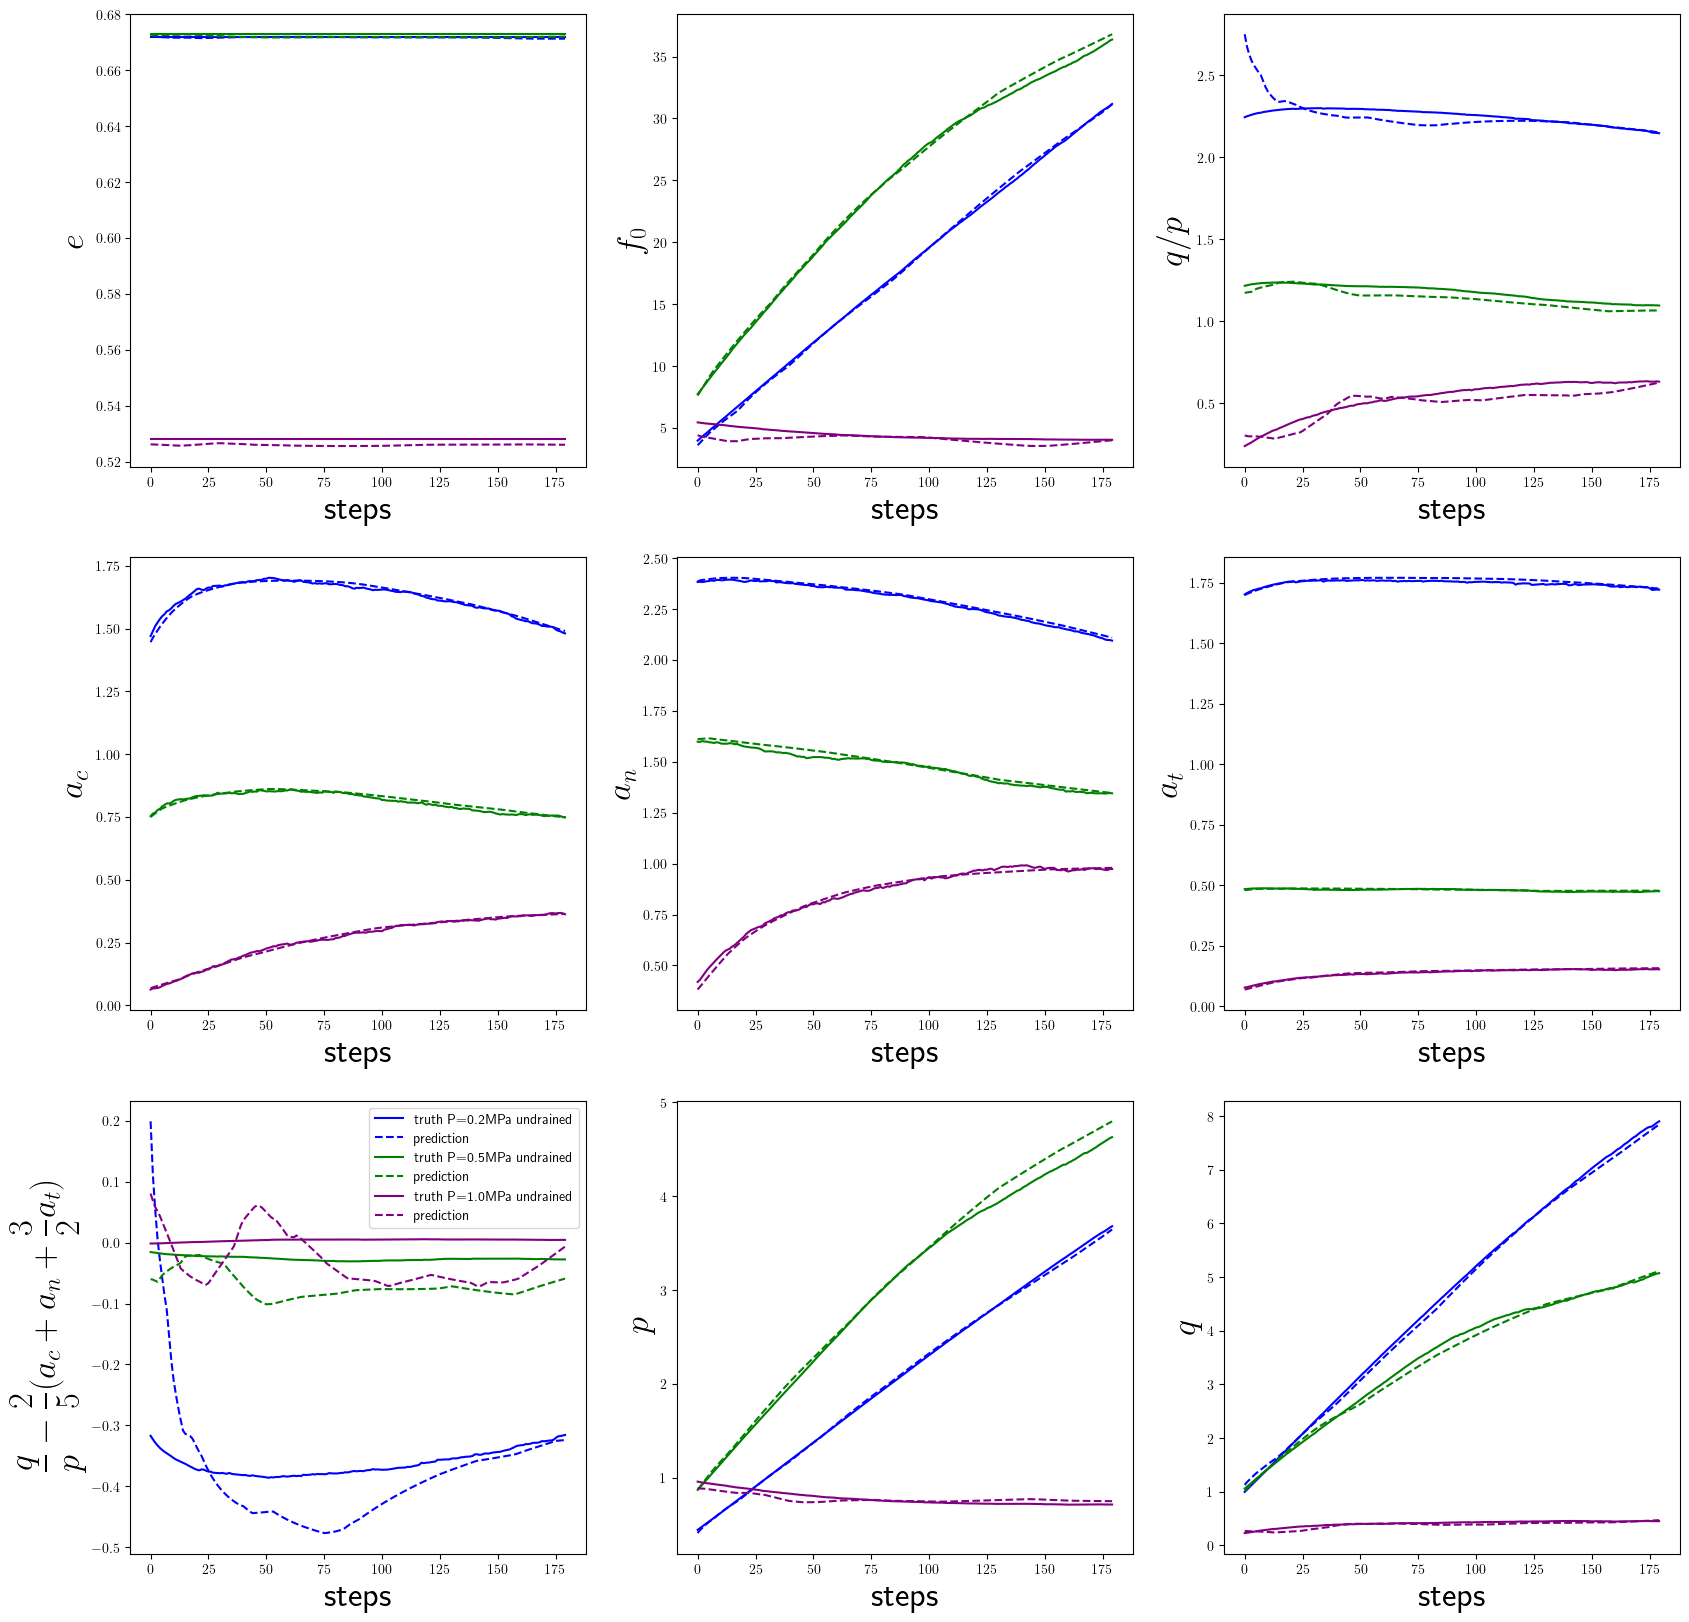

In [11]:
fig = plot_predictions(model, data['test'], train_stats, config, batch_size=len(data['test']))

## 2. Predict from a new dataset not used for training
We use `prepare_single_dataset` that will not windowize the data.

In [4]:
from grainlearning.rnn.preprocessing import prepare_single_dataset

In [5]:
config["raw_data"] = path_to_data
data = prepare_single_dataset(**config)

In [6]:
predictions_2 = predict_rnn.predict_macroscopics(model, data, train_stats, config, batch_size=10)

2023-02-19 13:58:27.630944: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-19 13:58:27.677883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### 📉 Plot the predictions

In [7]:
from grainlearning.rnn.evaluate_model import plot_predictions

2023-02-19 13:58:45.118528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


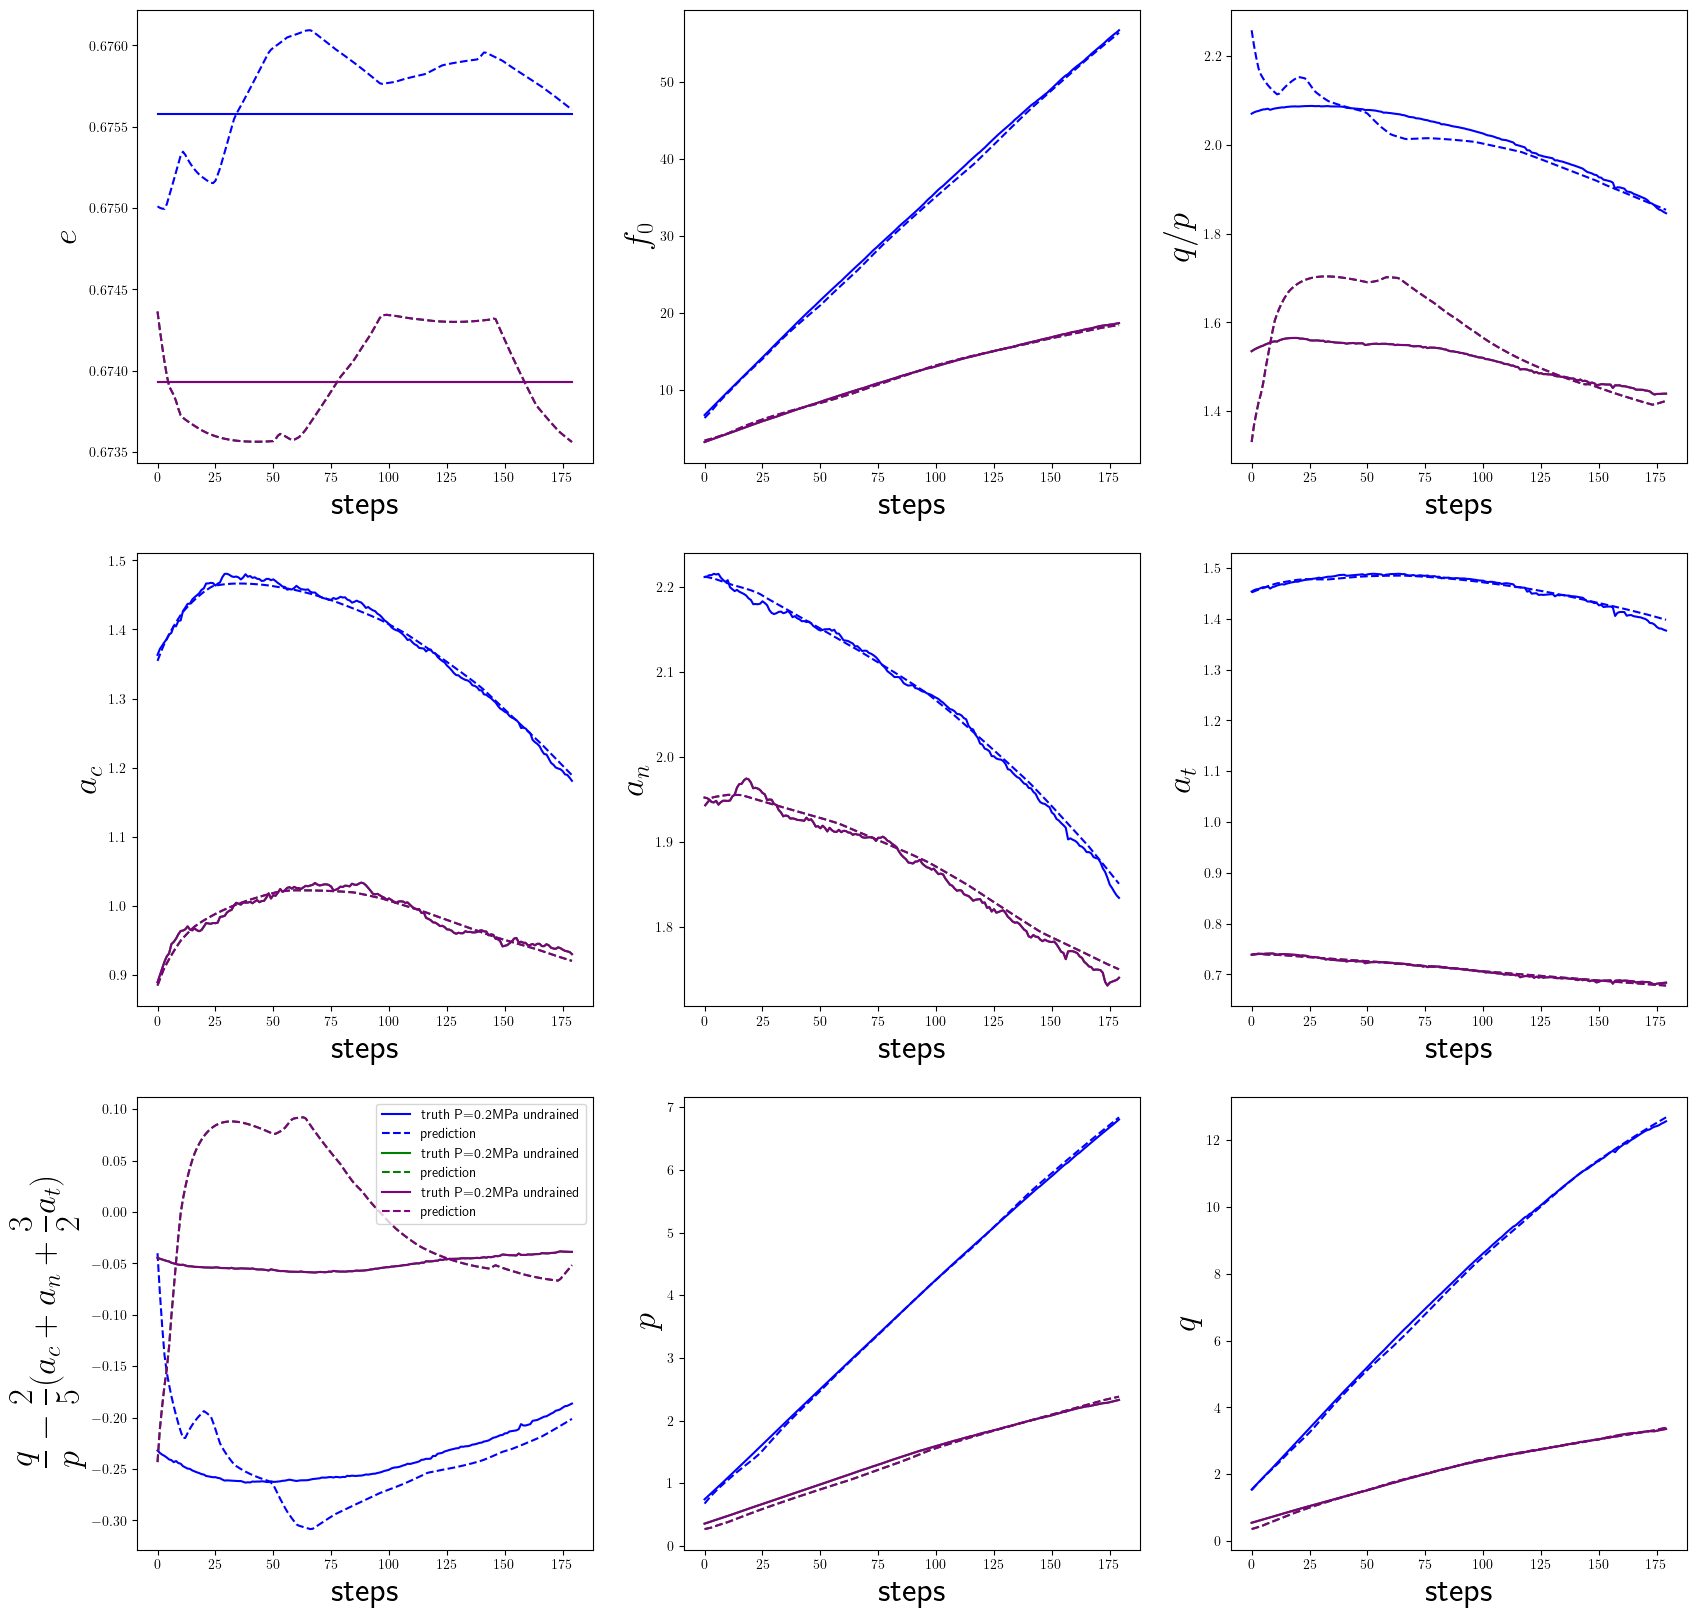

In [8]:
fig_2 = plot_predictions(model, data, train_stats, config, batch_size=10)